In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/dataset_new.csv'  # Update with your file's path
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

   Order Date Product Id  List Price  Quantity  Visibility  Cart Count  \
0  2023-01-01       P001         152        19        2888         3.8   
1  2023-01-02       P001         152        18        2736         3.6   
2  2023-01-03       P001         152         7        1064         1.4   
3  2023-01-04       P001         152        11        1672         2.2   
4  2023-01-05       P001         152         0           0         0.0   

   Cumulative Sales  7-Day Moving Avg  Sales Last 7 Days      Trend  \
0                19         19.000000                NaN        NaN   
1                37         18.500000               19.0  15.285714   
2                44         14.666667               37.0   1.714286   
3                55         13.750000               44.0   4.714286   
4                55         11.000000               55.0  -7.857143   

   Sort Rank  Interaction Score     Stars  Reviews Count  
0       80.0         345.805720  4.197317            624  
1       80

**EDA**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Date         20000 non-null  object 
 1   Product Id         20000 non-null  object 
 2   List Price         20000 non-null  int64  
 3   Quantity           20000 non-null  int64  
 4   Visibility         20000 non-null  int64  
 5   Cart Count         20000 non-null  float64
 6   Cumulative Sales   20000 non-null  int64  
 7   7-Day Moving Avg   20000 non-null  float64
 8   Sales Last 7 Days  19900 non-null  float64
 9   Trend              19900 non-null  float64
 10  Sort Rank          20000 non-null  float64
 11  Interaction Score  20000 non-null  float64
 12  Stars              20000 non-null  float64
 13  Reviews Count      20000 non-null  int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 2.1+ MB


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
# df['Product Id'] = df['Product Id'].astype('int')

In [ ]:
df.corr(numeric_only=True)['List Price']

,List Price
List Price,1.000000
Quantity,-0.004295
Visibility,0.557397
Cart Count,-0.004295
Cumulative Sales,-0.005877
7-Day Moving Avg,-0.011933
Sales Last 7 Days,-0.011215
Trend,0.000056
Sort Rank,-0.997994
Interaction Score,-0.002292


In [ ]:
df.corr(numeric_only=True)['Cumulative Sales']

,Cumulative Sales
List Price,-0.005877
Quantity,0.011701
Visibility,0.006389
Cart Count,0.011701
Cumulative Sales,1.000000
7-Day Moving Avg,0.028689
Sales Last 7 Days,0.132090
Trend,-0.039230
Sort Rank,0.005960
Interaction Score,0.004191


In [ ]:
# Extracting observed features
df['Quantity Sold'] = df['Quantity']  # Assuming Quantity is the number sold
df['List Count'] = df['List Price']  # Placeholder, adjust based on actual data
df['Product Display Count'] = df['Visibility']  # Placeholder, adjust based on actual data
df['Cart Count'] = df['Cart Count']  # Already present
df['Total Inventory'] = df['Quantity'].sum()  # Total inventory for the product


In [ ]:
# Sort Rank (Assuming sort rank is based on visibility)
df['Sort Rank'] = df['Visibility']  # Placeholder, adjust based on actual data


In [ ]:
# Competitiveness Ratio (Assuming total quantity sold across all products is known)
# Placeholder for total sales of the product category
total_sales = df['Quantity Sold'].sum()  # Total sales for the product
df['Competitiveness Ratio'] = df['Quantity Sold'] / total_sales


In [ ]:
df.head()

,Order Date,Product Id,List Price,Quantity,Visibility,Cart Count,Cumulative Sales,7-Day Moving Avg,Sales Last 7 Days,Trend,Sort Rank,Interaction Score,Stars,Reviews Count,Quantity Sold,List Count,Product Display Count,Total Inventory,Competitiveness Ratio
0,2023-01-01,P001,152,19,2888,3.8,19,19.000000,NaN,NaN,2888,345.805720,4.197317,624,19,152,2888,190996,0.000099
1,2023-01-02,P001,152,18,2736,3.6,37,18.500000,19.0,15.285714,2736,104.992475,4.732352,109,18,152,2736,190996,0.000094
2,2023-01-03,P001,152,7,1064,1.4,44,14.666667,37.0,1.714286,1064,84.310387,3.112823,353,7,152,1064,190996,0.000037
3,2023-01-04,P001,152,11,1672,2.2,55,13.750000,44.0,4.714286,1672,9.508422,3.363650,286,11,152,1672,190996,0.000058
4,2023-01-05,P001,152,0,0,0.0,55,11.000000,55.0,-7.857143,0,48.773317,3.014133,866,0,152,0,190996,0.000000


In [ ]:
# Interpolate missing values
df_interpolated = df.interpolate()


<ipython-input-17-bcf9d1ba52bb>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate()


In [ ]:
df_interpolated.head()

,Order Date,Product Id,List Price,Quantity,Visibility,Cart Count,Cumulative Sales,7-Day Moving Avg,Sales Last 7 Days,Trend,Sort Rank,Interaction Score,Stars,Reviews Count,Quantity Sold,List Count,Product Display Count,Total Inventory,Competitiveness Ratio
0,2023-01-01,P001,152,19,2888,3.8,19,19.000000,NaN,NaN,2888,345.805720,4.197317,624,19,152,2888,190996,0.000099
1,2023-01-02,P001,152,18,2736,3.6,37,18.500000,19.0,15.285714,2736,104.992475,4.732352,109,18,152,2736,190996,0.000094
2,2023-01-03,P001,152,7,1064,1.4,44,14.666667,37.0,1.714286,1064,84.310387,3.112823,353,7,152,1064,190996,0.000037
3,2023-01-04,P001,152,11,1672,2.2,55,13.750000,44.0,4.714286,1672,9.508422,3.363650,286,11,152,1672,190996,0.000058
4,2023-01-05,P001,152,0,0,0.0,55,11.000000,55.0,-7.857143,0,48.773317,3.014133,866,0,152,0,190996,0.000000


In [ ]:
df.isnull().sum()

,0
Order Date,0
Product Id,0
List Price,0
Quantity,0
Visibility,0
Cart Count,0
Cumulative Sales,0
7-Day Moving Avg,0
Sales Last 7 Days,100
Trend,100


In [ ]:
# Fill with mean
df['Sales Last 7 Days'].fillna(df['Sales Last 7 Days'].mean(), inplace=True)
df['Trend'].fillna(df['Trend'].mean(), inplace=True)

<ipython-input-8-ce2160b7fb8c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales Last 7 Days'].fillna(df['Sales Last 7 Days'].mean(), inplace=True)
<ipython-input-8-ce2160b7fb8c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
print(df.isnull().sum())

Order Date               0
Product Id               0
List Price               0
Quantity                 0
Visibility               0
Cart Count               0
Cumulative Sales         0
7-Day Moving Avg         0
Sales Last 7 Days        0
Trend                    0
Sort Rank                0
Interaction Score        0
Stars                    0
Reviews Count            0
Quantity Sold            0
List Count               0
Product Display Count    0
Total Inventory          0
Competitiveness Ratio    0
dtype: int64


**Prediction**

**DEMAND PRICE PREDICTION MODEL**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3996.9773
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44.4819
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.8512
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2770
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1772
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3165
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5578
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3457
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9323
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6465
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error of the Ensemble Model: 7.047265171422623e-11


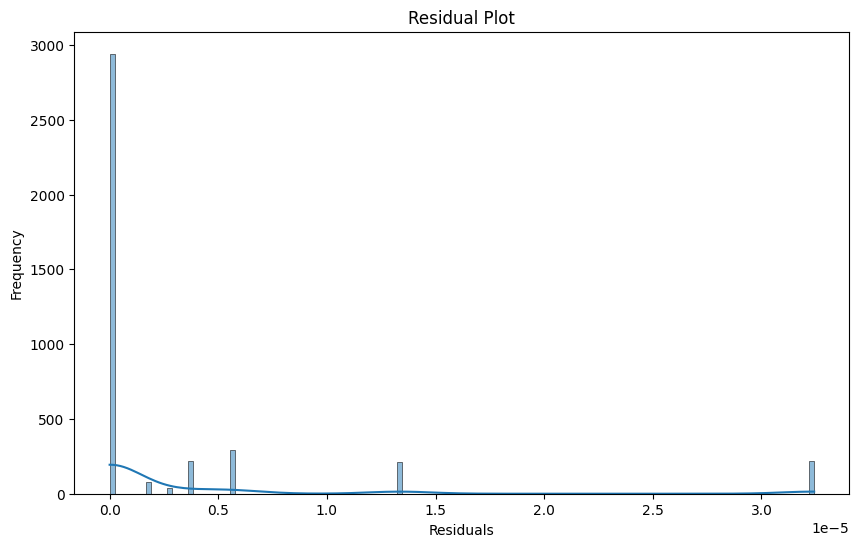

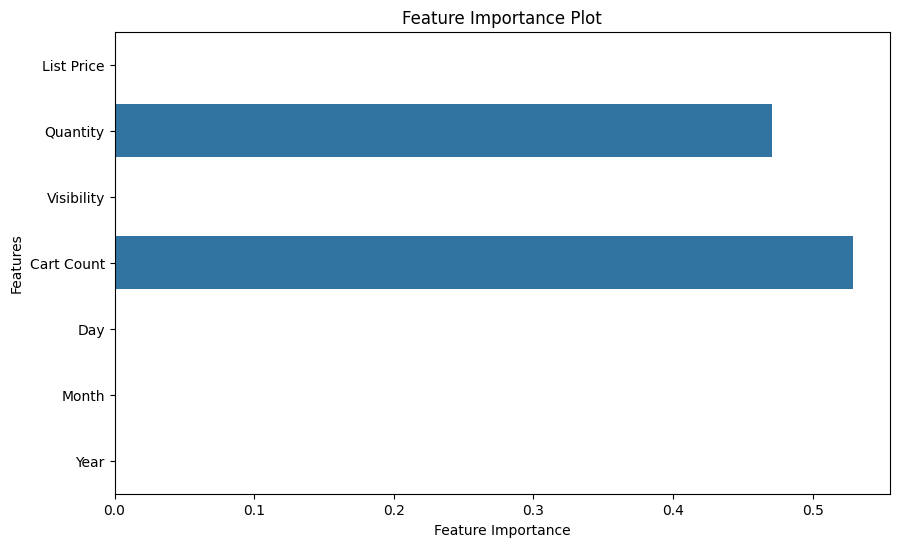

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.fillna(0, inplace=True)  # Handle NaNs

# Feature engineering
df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Split data into features and target variable
X = df[['List Price', 'Quantity', 'Visibility', 'Cart Count', 'Day', 'Month', 'Year']]
y = df['Quantity Sold']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# LSTM Model
# Reshape the input data for LSTM (assuming time steps = 1)
X_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Reshape y_train to match LSTM output shape
y_train_lstm = y_train.values.reshape(-1, 1)
model.fit(X_lstm, y_train_lstm, epochs=10, batch_size=32)

# For prediction, reshape X_test as well
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
# Predict on the test set for the LSTM model
pred_lstm = model.predict(X_test_lstm) # Changed this line to predict on X_test_lstm
# ARIMA Model
arima_model = ARIMA(y, order=(1, 2, 1))
arima_result = arima_model.fit()

# Predictions
pred_lr = lr.predict(X_test)
pred_xgb = xgb.predict(X_test)
pred_rf = rf.predict(X_test)
# Reshape pred_lstm to (4000,) to match the shape of other predictions
pred_lstm = pred_lstm.reshape(-1) # Added this line to reshape pred_lstm
pred_arima = arima_result.forecast(steps=len(y_test))

# Ensemble Prediction
final_prediction = np.median([pred_lr, pred_xgb, pred_rf, pred_lstm, pred_arima], axis=0)

# Evaluate the final model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, final_prediction)
print(f'Mean Squared Error of the Ensemble Model: {mse}')



# Now you can calculate residuals and plot them
residuals = y_test - final_prediction
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot')
plt.show()



# 3. Feature Importance (for tree-based models)
if isinstance(rf, RandomForestRegressor) or isinstance(xgb, XGBRegressor):
    feature_importance = rf.feature_importances_ if isinstance(rf, RandomForestRegressor) else xgb.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

In [ ]:
# LSTM Model
# Reshape the input data for LSTM (assuming time steps = 1)
X_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Reshape y_train to match LSTM output shape
y_train_lstm = y_train.values.reshape(-1, 1)
model.fit(X_lstm, y_train_lstm, epochs=10, batch_size=32)

# For prediction, reshape X_test as well
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
pred_lstm = model.predict(X_test_lstm)

# ... (rest of your code)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 615.3162
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.2911
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7944
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0873
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2586
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1094
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3010
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7970
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2729
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0744
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import minimize

# Load data
data = pd.read_csv('sales_data.csv')

# Feature engineering
data['Price'] = ...  # Define price features
data['Product_Embedding'] = ...  # Generate embeddings

# Train-test split
X = data[['Price', 'Product_Embedding', ...]]
y = data['Quantity Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train demand prediction model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Define revenue function
def revenue_function(prices):
    quantities = model.predict(prices)  # Predict demand at given prices
    return -np.sum(prices * quantities)  # Negative for minimization

# Price optimization
initial_prices = np.array([10, 15, 20])  # Example initial prices
result = minimize(revenue_function, initial_prices, method='SLSQP')

optimal_prices = result.x
print(f'Optimal Prices: {optimal_prices}')


**Elasticity**

In [ ]:
# Given values
original_price = 1400
new_price_increase = original_price * (1 + 0.05)  # Increase by 5%
new_price_decrease = original_price * (1 - 0.05)  # Decrease by 5%

original_quantity = 7  # Demand at original price
new_quantity_increase = 11  # Demand at increased price

# Calculate changes
delta_Q = new_quantity_increase - original_quantity
delta_P_increase = new_price_increase - original_price
delta_P_decrease = new_price_decrease - original_price

# Price Elasticity Calculation
E_d_increase = (delta_Q / original_quantity) / (delta_P_increase / original_price)
E_d_decrease = (delta_Q / original_quantity) / (delta_P_decrease / original_price)

print(f'Price Elasticity of Demand (Increase): {E_d_increase}')
print(f'Price Elasticity of Demand (Decrease): {E_d_decrease}')


Price Elasticity of Demand (Increase): 11.428571428571427
Price Elasticity of Demand (Decrease): -11.428571428571427


**Optimization**

In [ ]:
from scipy.optimize import linprog
import numpy as np

# Example data
n = 3  # Number of products
c = 3500  # User-defined total price constraint
prices = np.array([[1000, 1200, 1400],  # Prices for product 1
                   [1100, 1300, 1500],  # Prices for product 2
                   [900, 1100, 1300]]) # Prices for product 3
demands = np.array([[11, 7, 5],          # Demand for product 1
                    [10, 6, 4],         # Demand for product 2
                    [12, 8, 6]])        # Demand for product 3

# Flatten the price and demand arrays for optimization
p_flat = prices.flatten()
d_flat = demands.flatten()

# Coefficients for the objective function
c_obj = - (p_flat * d_flat)  # We negate because linprog does minimization

# Constraints setup
A_eq = np.zeros((n + 1, 3 * n))
b_eq = np.ones(n).tolist() + [c]

# Fill equality constraints for selecting one price per product
for i in range(n):
    A_eq[i, i * 3:(i + 1) * 3] = 1

# Fill equality constraint for total price selection
A_eq[n, :] = prices.flatten()

# Bounds for x variables (0 to 1)
bounds = [(0, 1) for _ in range(3 * n)]

# Solve the linear programming problem
result = linprog(c_obj, A_eq=A_eq, b_eq=b_eq, bounds=bounds)

# Check if a solution was found before reshaping
if result.success:
    optimal_prices = result.x.reshape(n, 3)
    optimal_price_indices = np.argmax(optimal_prices, axis=1)

    print("Optimal Price Indices:", optimal_price_indices)
    print("Optimal Prices:", prices[np.arange(n), optimal_price_indices])
else:
    print("Optimization failed. linprog status:", result.status)
    print("linprog message:", result.message)

Optimal Price Indices: [0 0 2]
Optimal Prices: [1000 1100 1300]


visualization

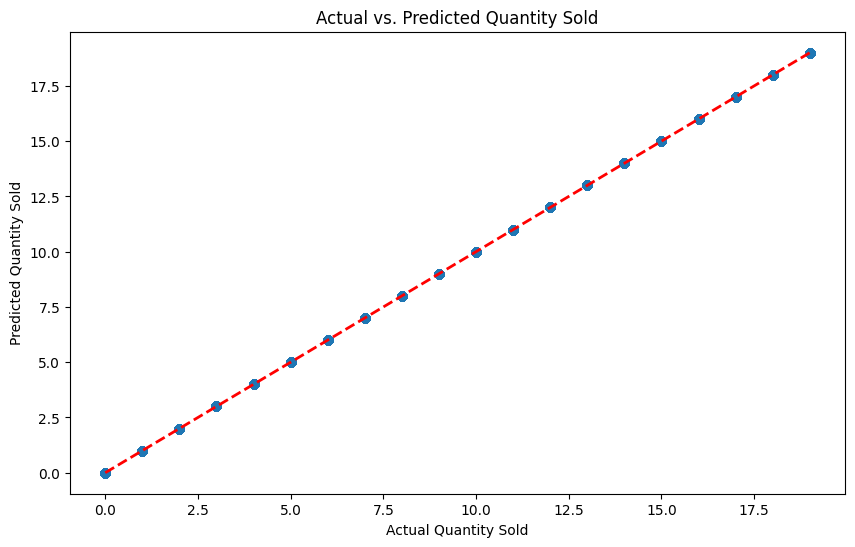

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Visualizations

# 1. Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold')
plt.show()

# 2. Residual Plot
residuals = y_test - final_prediction
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot')
plt.show()

# 3. Feature Importance (for tree-based models)
if isinstance(rf, RandomForestRegressor) or isinstance(xgb, XGBRegressor):
    feature_importance = rf.feature_importances_ if isinstance(rf, RandomForestRegressor) else xgb.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 483076.9062
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 308413.4688
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 308997.5625
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 306907.5312
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 301444.3750
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 297149.7188
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 294668.9688
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 287694.3125
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 281328.6875
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 267007.2188
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Mean Squared Error of the Ensemble Model: 1752.3496261876421


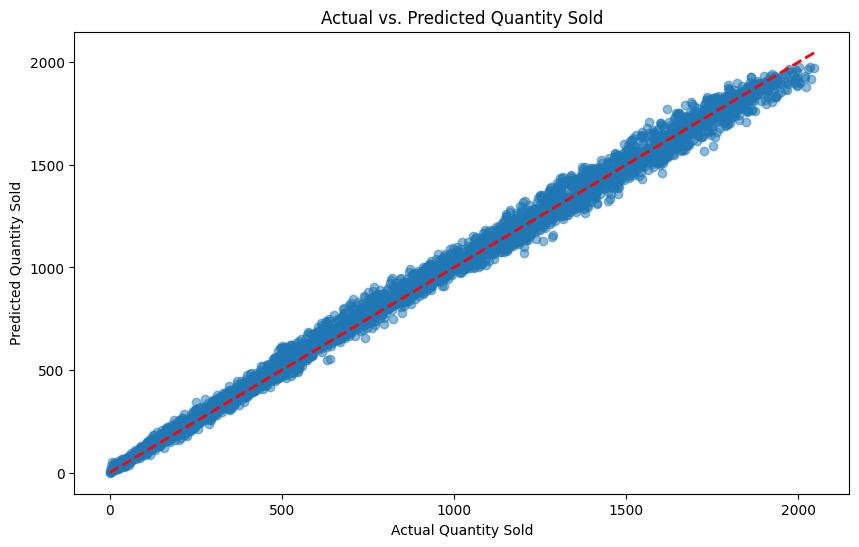

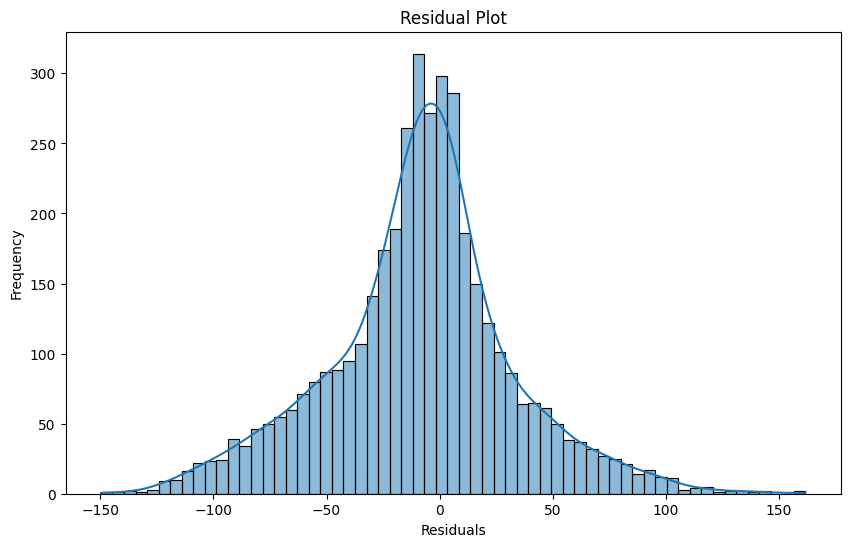

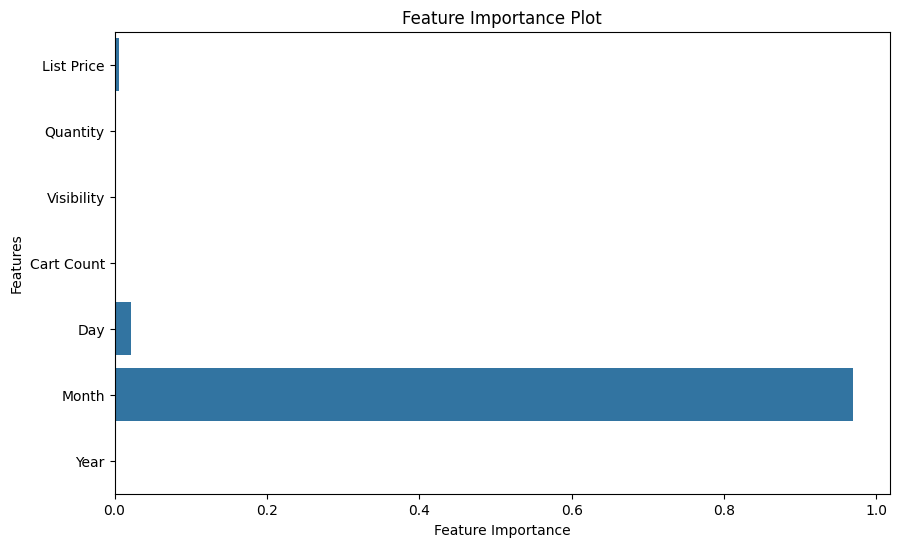

In [ ]:
# Visualizations

# 1. Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('Actual vs. Predicted Quantity Sold')
plt.show()

# 2. Residual Plot
residuals = y_test - final_prediction
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot')
plt.show()

# 3. Feature Importance (for tree-based models)
if isinstance(rf, RandomForestRegressor) or isinstance(xgb, XGBRegressor):
    feature_importance = rf.feature_importances_ if isinstance(rf, RandomForestRegressor) else xgb.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

In [ ]:
df.head()

,Order Date,Product Id,List Price,Quantity,Visibility,Cart Count,Cumulative Sales,7-Day Moving Avg,Sales Last 7 Days,Trend,Sort Rank,Interaction Score,Stars,Reviews Count,Day,Month,Year
0,2023-01-01,P001,152,19,2888,3.8,19,19.000000,0.0,0.000000,80.0,345.805720,4.197317,624,1,1,2023
1,2023-01-02,P001,152,18,2736,3.6,37,18.500000,19.0,15.285714,80.0,104.992475,4.732352,109,2,1,2023
2,2023-01-03,P001,152,7,1064,1.4,44,14.666667,37.0,1.714286,80.0,84.310387,3.112823,353,3,1,2023
3,2023-01-04,P001,152,11,1672,2.2,55,13.750000,44.0,4.714286,80.0,9.508422,3.363650,286,4,1,2023
4,2023-01-05,P001,152,0,0,0.0,55,11.000000,55.0,-7.857143,80.0,48.773317,3.014133,866,5,1,2023
